In [60]:
%pylab inline
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

Populating the interactive namespace from numpy and matplotlib


/Users/toodivz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'power', 'linalg', 'fft', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [61]:
mpl.rcParams.update({'font.size':18})


In [62]:
x,y,f = np.loadtxt("LatticeSierpinski_18x18.xyz",usecols=(1,2,4),skiprows=2,unpack=True)

In [63]:
r = 1.1
Dic = {}
natoms = int( len(x) )
for n in range(natoms):
    a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r
    vecinos = [i for i, x in enumerate(a) if x and i!=n]
    Dic[n] = vecinos

In [64]:
H = np.zeros((natoms,natoms))

In [65]:
γ = 1
λ = 4.5
for n in Dic.keys():
    vecinos = Dic[n]
    for v in vecinos:
        f0 = f[n]
        f1 = f[v]
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        H[n,v] = fase
        H[v,n] = fase

f0 = 0
f1 = 0
fase = 1
for n in Dic.keys():
    vecinos = Dic[n]
    for v in vecinos:
        posx     = x[n]
        posy     = y[n]
        f0       = f[n]
        f1       = f[v] 
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        
        if ( posx%2==0 and posy%2==0  ):
            if ( x[v] > x[n] ):
                H[(n,v)] = -fase
                H[(v,n)] = -fase
        elif(posx%2==1 and posy%2==1):
            if ( x[v] > x[n] ):
                H[(n,v)] = -fase
                H[(v,n)] = -fase
        else:
            pass

In [66]:
Hop = {}
for i in Dic.keys():
    Hop[i] = [H[i][j] for j in range(len(H[i])) if H[i][j]!= 0]

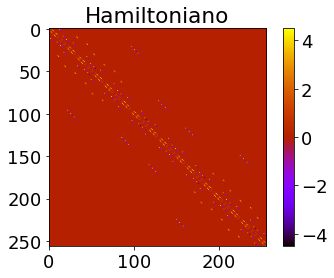

In [67]:
fig, ax = plt.subplots()
cx = ax.imshow(H, cmap = 'gnuplot')
ax.set_title('Hamiltoniano')
fig.colorbar(cx)
fig.savefig('hamiltonian_18x18_a.pdf')

In [68]:
%%time
Ek, U = eigh(H)
Ek = np.real(Ek)

CPU times: user 117 ms, sys: 30.8 ms, total: 148 ms
Wall time: 37.4 ms


In [69]:
np.savetxt("Energias_a.txt",Ek,fmt = '%s', comments = '')
np.savetxt("Estados_a.txt",U,fmt = '%s', comments = '')

Text(0.5, 0, '$E_k$')

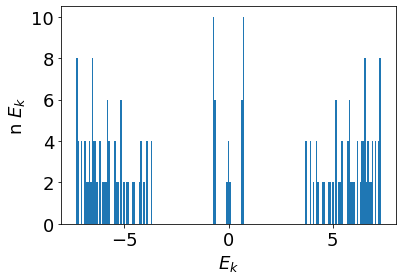

In [70]:
fig, ax = plt.subplots()
ax.hist(np.real(Ek),201)
ax.set_ylabel('n $E_k$')
ax.set_xlabel('$E_k$')

In [71]:
indexsort = argsort(Ek)
Est = [i for i,val in enumerate(Ek) if abs(val) < 6e-3 and abs(val) > 3e-3]
ek = np.mean(Ek[Est])
s = [np.real(U.T[i]*U.T.conjugate()[i]) for i in Est]
S = np.zeros(len(s[0]))
for i in range(len(s)):
    S += s[i] 
S = S/len(s)

In [72]:
Est  = [125, 126, 128, 129]

In [73]:
print(Est)

[125, 126, 128, 129]


In [74]:
Rx = []
Ry = []
for i in np.unique(f):
    find = [j for j,val in enumerate(f) if val == i]
    X = [x[i] for i in find]
    Y = [y[i] for i in find]
    xmax = np.amax(X)
    xmin = np.amin(X)
    ymax = np.amax(Y)
    ymin = np.amin(Y)
    rx = (xmax + xmin)/2
    ry = (ymax + ymin)/2
    Rx.append(rx)
    Ry.append(ry)

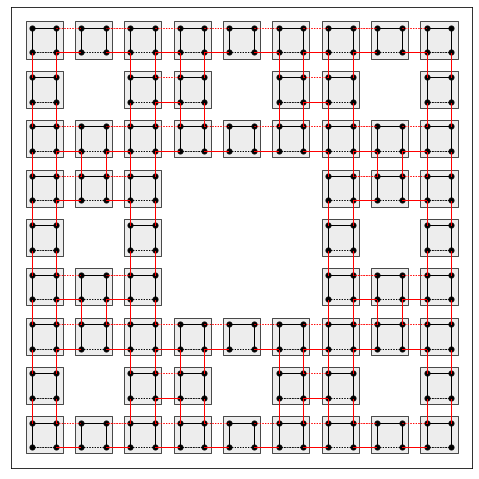

In [87]:
figsize(7,7)
fig, ax = plt.subplots(1)
ax.plot(x,y, marker='o', color='black', markersize=5,linestyle="")

boxes = []
for i in range(len(Rx)):
    rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
    boxes.append(rect)
for i in Dic.keys():
    c = 0
    for v in Dic[i]:
        if Hop[i][c] == 1:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'black', lw = 1)
        elif Hop[i][c] == -1:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'black', lw = 1, ls = ':')
        elif Hop[i][c] == 4.5:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'r', lw = 1)
        elif Hop[i][c] == -4.5:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'r', lw = 1, ls = ':')
        c+=1  
        

    
pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
ax.add_collection(pc)
fig.tight_layout()
ax.set_aspect('equal')
#ax.set_title(r'$\lambda = 4.5, \gamma = 1$')
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
#fig.savefig('hoti_fractal_square.pdf')
fig.savefig('hoti_fractal_square.pdf')
plt.show()

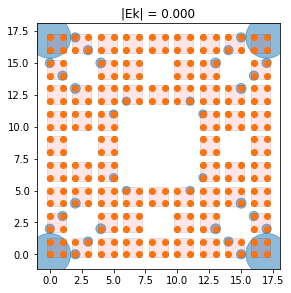

In [16]:
fig, ax = plt.subplots(1)

ax.scatter(x,y,s=S*10000,alpha=0.5)
ax.scatter(x,y)
boxes = []
for i in range(len(Rx)):
    rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
    boxes.append(rect)

pc = PatchCollection(boxes, facecolor='r', alpha=0.1,edgecolor='black')
ax.add_collection(pc)
fig.tight_layout()
ax.set_aspect('equal')
ax.set_title("|Ek| = {0:.3f}".format(abs(ek)))
plt.show()

In [17]:
indexsort = argsort(Ek)

In [18]:
from ipywidgets import *


In [19]:
Ei = np.unique(np.round(Ek,3))
@interact(n=(0,len(Ei) - 1))
def enpsi(n=0):
    Est = [i for i,val in enumerate(np.round(Ek,3)) if val == Ei[n]]
    Esel = Ei[n]
    s = [U.T[i]*U.T[i] for i in Est]
    S = np.zeros(len(s[0]))
    for i in range(len(s)):
        S += s[i] 
    S = S/len(s)
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.0,6.0))
    axes.set_title("Ek = {0:.3f}".format(Esel))
    axes.scatter(x,y,color="red",s=3,zorder=2)
    axes.scatter(x,y,s=S*10000,alpha=0.5)
    
    fig.tight_layout()
    boxes = []
    for i in range(len(Rx)):

        rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
        boxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(boxes, facecolor='r', alpha=0.1,
                         edgecolor='black')

    # Add collection to axes
    axes.add_collection(pc)
    plt.show()

    

interactive(children=(IntSlider(value=0, description='n', max=125), Output()), _dom_classes=('widget-interact'…

In [20]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

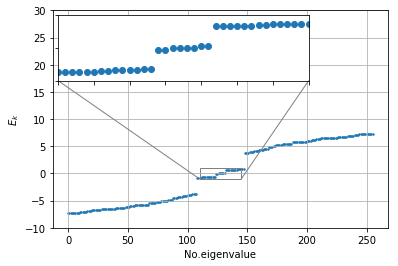

In [21]:
fig, ax = plt.subplots()
ax.scatter(range(len(indexsort)),Ek[indexsort],s=2)
ax.set_xlabel("No.eigenvalue")
ax.set_ylabel("$E_k$")
ax.set_ylim(-10,30)
ax.grid()

axins = zoomed_inset_axes(ax, 6, loc=2) # zoom = 6
axins.scatter(range(len(indexsort)),Ek[indexsort])
x1, x2, y1, y2 = 110, 145, -1, 1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
plt.yticks(visible=False)
#axins.grid()
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

plt.draw()
plt.show()

fig.savefig('Ekvs#Ek_con_18x18_a.pdf')

In [22]:
##funcion para encontrar los estados que posteriormente se braketearan (jajaja) en el flujo de barry

Chern = []
for ek in range(0,len(Ek)):#,len(Ek)):
    Fbarry = []
    for i in range(0,18):
        for j in range(0,18):
                ax  = np.where(x == i)
                bx  = np.where(x == i+1)
                a   = np.hstack((ax,bx))
                ny  = y[a][0]
                ay  = np.where(ny == j)
                by  = np.where(ny == j+1)
                b   = np.hstack((ay,by))[0]
                #print(b,i,j)
                ϕ   = U.T[ek][b]
                if len(b) == 4:
                    fb = -(log(ϕ[0]*ϕ[2].conjugate()*ϕ[2]*ϕ[3].conjugate()*ϕ[3]*ϕ[1].conjugate()*ϕ[1]*ϕ[0].conjugate()).imag)
                    Fbarry.append(fb)
                    
    Q = sum(Fbarry)/(2*pi)
    Chern.append(Q)            

    


/home/madv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


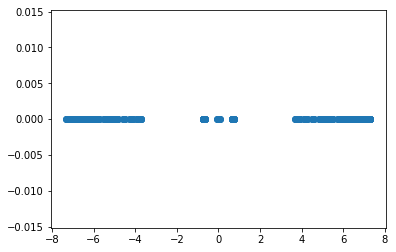

In [23]:
scatter(Ek,Chern)